In [1]:
options(repr.plot.width=4, repr.plot.height=4)

# Introduction to Time Series Analysis

## Real Life Examples

The first step in any time series investigation always involves careful scrutiny of the recorded data plotted over time

### Johnson & Johnson

![Johnson & Johnson](./Images/johnson_johnson.png)

This picture shows quarterly earnings per share for the U.S. company Johnson&Johnson.

In this case we want to focus our attention on the __increasing underlying trend variability__, and somewhat __regular oscillation__ superimposed on the trend that seems to repeat over quarters.

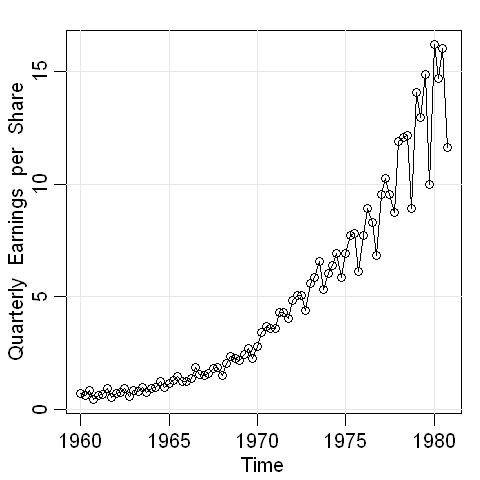

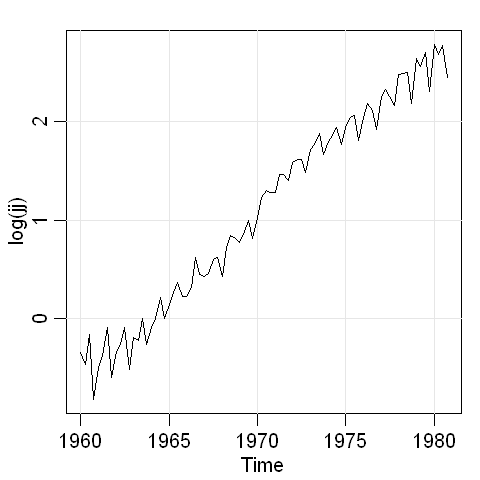

In [2]:
library(astsa)
tsplot(jj, type="o", ylab="Quarterly  Earnings  per  Share")
tsplot(log(jj)) # not  shown

### S&P100 Index

![S&P100 Index](./Images/S&P100.png)

This picture shows prices and daily returns of the Standard and Poor’s 100 Index (S&P100) from 1984 to 2017

It is easy to spot the financial crisis of 2008 in the figure

The mean of the series appears to be stable with an average return of apporximately zero, however, the __volatility__ (or __variability__) of data __exhibits clustering__; that is __highly volative periods tend to be clustered together__

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



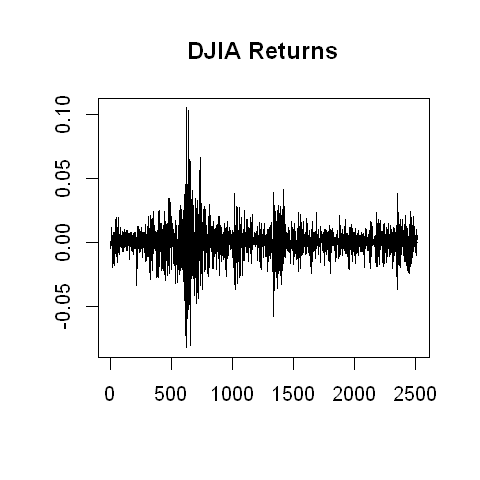

In [3]:
library(xts)
djiar = diff(log(djia$Close))[-1] # approximate returns
ts.plot(ts(djiar), main = "DJIA Returns", xlab='', margins=0)

### USD/GBP Foreign exchange rate

![USD/GBP Foreign exchange rate](./Images/USD_GBP.png)

This image shows the weekly USD/GBP foreign exchange rate (U.S. Dollars to One British Pound)

Loading required package: timeDate
Loading required package: timeSeries

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-



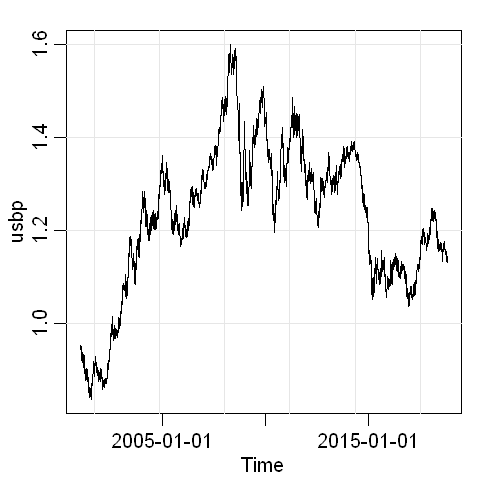

In [4]:
library("fImport")
usbp=fredSeries("DEXUSEU", from="2001-01-01")
tsplot(usbp)

### Crypto currencies

![Crypto currencies](./Images/crypto_currencies.png)

This image shows Cryptocurrency “BitCoin” from April 28, 2013 to November 25, 2017

## Time series methods

The primary objective of time series analysis is to develop mathematical models that provide plausible descriptions for sample data

### White noise

A simple kind of generated series might be a collection of uncorrelated random variables, _wt_, with __mean 0__ and __finite variance $\sigma^2$__. We denote this process as __$\epsilon_t \sim N(0,\sigma^2)$__

The time series generated from uncorrelated variables is used as a model for noise in engineering applications where it is called white noise

We often require stronger conditions and need the noise to be __Gaussian white noise__, where in the $\epsilon_t$ are independent and identically distributed (iid) normal random variables, with __mean 0__ and __variance $\sigma^2$__

Although both cases require __0 mean__ and __constant variance__, the difference is that generically, the term white noise means the time series is uncorrelated. __Gaussian white noise__ implies __normality__ (which implies __independence__)

If the stochastic behaviour of all time series could be explained in terms of the __white noise model__, classical statistical methods would suffice.

### Moving averages and filters

We might __replace__ the __white noise series wt__ __by__ a __moving average__ that __smooths the series__

e.g.

$$ v_t = \frac{1}{3}(\epsilon_{-1} + \epsilon_t + \epsilon_{t+1})$$

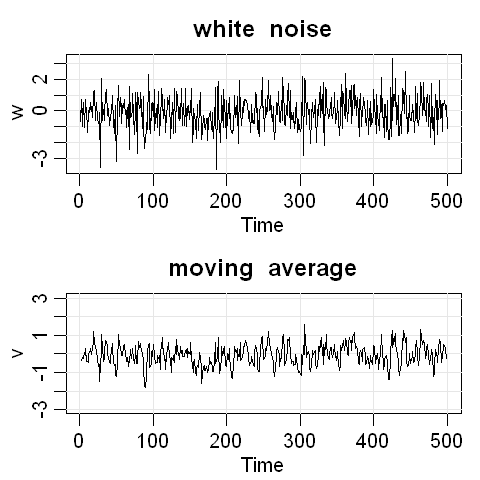

In [5]:
w = rnorm (500,0,1) # 500 N(0,1)  variates
v = filter(w, sides=2, rep (1/3 ,3)) # moving  average
par(mfrow=c(2,1))
tsplot(w, main="white  noise")
tsplot(v, ylim=c(-3,3), main="moving  average")

This series is much smoother than the white noise series, and it is apparent that averaging removes some of the high frequency behaviour of the noise.

A linear combination of values in a time series such as the above equation is referred to, generically, a filtered series; hence the command filter.

### Autoregressions

Suppose we consider the __white noise series $\epsilon_t$__ as input and calculate the output using the __second order equation__

$$ x_t = x_{t-1} -0.9x_{t-2}+\epsilon_t$$

Successively for t = 1,2... the previous equation represents a __regression or prediction__ fo the current value __$x_t$__ of a time series as a __function of the past two values__ of the series, and, hence, the term autoregression is suggested for this model.

A problem with startup values exists here because the equation also depends on the initial conditions $x_0$ and $x_{-1}$, but for now assume they are 0. We can then generate data recursively by substituting into the previuos formula

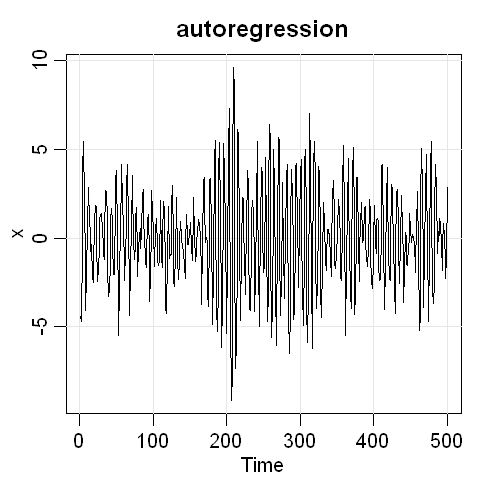

In [6]:
w = rnorm (550,0,1) # 50  extra  to  avoid  startup  problems
x = filter(w, filter=c(1,-.9), method="recursive")[-(1:50)]
tsplot(x, main="autoregression")

### Random walk with drift

$$ x_t = \delta + x_{x-1} + \epsilon_t$$

for t = 1,2,... with initial condition x_0 = 0, ans where ε_t is white noise. The constant δ is called the drift, and when δ = 0, the model is called simply a random walk because the value of the time t is the value of the series at time t-1 plus a completely random movement determined by ε_t. Note that we may rewrite the previous formula as a cumulative sum of white noise variates.

$$ x_t = \delta_t + \sum_{j = 1}^t \epsilon_j$$

for t = 1,2,...

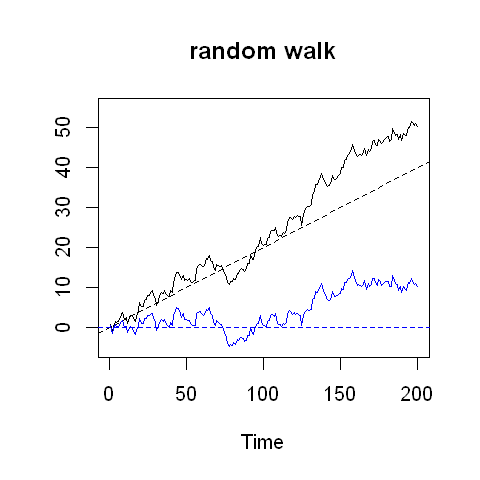

In [7]:
set.seed(154) # so you can reproduce the results
w = rnorm(200); x = cumsum(w) # two commands in one line
wd = w + .2; xd = cumsum(wd)
ts.plot(xd, ylim = c(-5, 55), main = "random walk", ylab ='')
abline(a = 0, b= .2, lty = 2) # drift
lines (x, col = 4)
abline (h = 0, col = 4, lty = 2)

### Measures of Dependence

We now discuss various measures that describe the general behavior of a process as it evolves over time. A rather simple descriptive measure is the mean function, such as the average monthly high temperature for your city. In this case, the mean is a function of time.

#### The mean function

$$ \mu_{x_t} = E(x_t) $$

#### The autocovariance function

$$\gamma_x(t,s) = cov(x_t,x_s) = E[(x_t - \mu_t)(x_s - \mu_s)]$$

The autocovariance measures the linear dependence between two points on the same series observed at different times.

Recall from classical statistics that if $\gamma_x(t,s) = 0$, then $x_s$ and $x_t$ are not linearly related, but there still may be some dependence structure between them.

If, however, $x_t$ and $x_s$ are bivariate normal, 
$\gamma_x(t,s) = 0$ ensures their independence. It is
clear that, for $s = t$, the autocovariance reduces to the (assumed finite) variance, because

$$\gamma_x(t,t) = cov(x_t,x_t) = E[(x_t-\mu_t)^2]=var(x_t)$$

#### The autocorrelation function

$$\rho_x(t,s) = \frac{\gamma_x(t,s)}{\sqrt{\gamma_x(t,t)}\sqrt{\gamma_x(s,s)}}$$

The ACF measures the linear predictability of the series at time $t$, say $x_t$, using only the value $x_s$.

We can show easily that $−1 \leq \rho_x(t,s)\leq 1$ using the Cauchy–Schwarz inequality.

If we can predict $x_t$ perfectly from $x_s$ through a linear relationship, $x_t = \beta_0 + \beta_1 x_s$, then
the correlation will be +1 when $\beta_1 > 0$, and −1 when $\beta_1 < 0$.

### Stationary time series

A strictly stationary time series is one for which the probabilistic behaviour of every collection of values and shifted values

$$\{x_{t_1},x_{t_2},...,x_{t_k}\}\,\ \{x_{t_1+h},x_{t_2+h},...,x_{t_k+h}\}$$

are identical, for all $k=1,2,...$ all the points $t_1,t_2,...,t_k$ and all time shifts $h=0,\pm 1,\pm 2,...$

It is difficult to assess strict stationarity from data, however, stationary time series data should exhibit similar behaviors over different time intervals.

A series that is obviously not stationary because of trend is global temperature.

A series that appears to be stationary is the moving average.

Rather than imposing conditions on all possible distributions of a time series, we will use a milder version that imposes conditions only on the first two moments of the series.

#### Definition
A weakly stationary time series is a finite variance process where

1. the mean value function, $\mu_t$ is constant and does not depend on time $t$, and
2. the autocovariance function, $\gamma(t,s)$ depends on $s$ and $t$ only through their distance $\mid t − s\mid$.

Henceforth, we will use the term stationary to mean weakly stationary; if a process is stationary in the strict sense, we will use the term strictly stationary.

Stationarity requires regularity in the mean and autocorrelation functions so that these quantities (at least) may be estimated by averaging. It should be clear that a strictly stationary, finite variance, time series is also stationary. The converse is not true in general.

One important case where stationarity implies strict stationarity is if the time series is Gaussian (meaning all finite collections of the series are Gaussian).

#### Definition

The autocovariance function of a stationary time series is defined as

$$ \gamma_x(t+h,t) = cov(x_{t+h},x_t) = E[(x_{x+h}-\mu)(x_t-\mu)]$$

and the autocorrelation function (ACF) will be written as

$$\rho_x(h) = \frac{\gamma_x(h)}{\gamma_x(0)}$$

#### Definition (Wold decomposition)

Any stationary time series, $x_t$, can be written as linear combination (filter) fo white noise terms; that is

$$ x_t = \mu \sum_{j=0}^\infty \psi_j\epsilon_{t-j} $$

where the $\psi$'s are numbers satisfying $\sum_{j=0}^\infty \psi_j^2 < \infty$ with $\psi_0 = 1$ and $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$.

We call these linear processes

### Exercises

#### Exercise 1

Let $v_t$ a moving average filter defined in equation
$$ v_t = \frac{1}{3}(\epsilon_{t-1}+\epsilon_t+\epsilon_{t+1})$$

then

1. calculate the mean function of $v_t$
2. calculate the autocovariance function of $v_t$
3. calculate the autocorrelation function of $v_t$

#### Exercise 2

Let $\epsilon_t \sim WN(0,\sigma^2_\epsilon)$ then

1. calculate the autocovariance function of $v_t$
2. calculate the autocorrelation function of $v_t$

#### Exercise 3

Let $x_t$ a random walk with drift process then

1. calculate the mean function of $x_t$
2. calculate the autocovariance function of $x_t$
3. calculate the autocorrelation function of $x_t$

#### Exercise 4

Let $x_t = \phi x_{t-1} +\epsilon_t$ where $\epsilon_t \sim WN(0,\sigma^2_\epsilon)$ and $ \mid\phi\mid <1$, then

1. calculate the mean function of $x_t$
2. calculate the variance function of $x_t$
3. calculate the autocovariance function of $x_t$
4. calculate the autocorrelation function of $x_t$

## ARIMA Models

### Introduction

Classical regression is often insufficient for explaining all of the interesting dynamics of a time series. Instead, the introduction of correlation through lagged linear relationships leads to proposing the autoregressive (AR) and moving average (MA) models.

Often, these models are combined to form the autoregressive moving average (ARMA) model.

Adding nonstationary models to the mix leads to the autoregressive integrated moving average (ARIMA) model popularized in the landmark work by Box and Jenkins (1970).

Seasonal data lead to seasonal autoregressive integrated moving average (SARIMA) models.

The Box–Jenkins method for identifying a plausible models is given in this chapter along
with techniques for parameter estimation and forecasting.

### Autoregressive processes

First, we investigate __autoregressive models__, which are an obvious extension of linear regression models.

#### Definition

An autoregressive model of order $p$, abbreviated $AR(p)$, is of the form

$$x_t = \phi_1x_{t-1} + \phi_2x_{t-2}+...+\phi_px_{t-p}+\epsilon_t\ \ \ (13)$$

where $x_t$ is stationary, and $\phi_1$,$\phi_2$,...,$\phi_p$ are constants $\phi_p\neq 0$. Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with mean zero and variance $\sigma_\epsilon^2$, abbreviated $\epsilon_t\sim WN(0,\sigma_\epsilon^2)$, unless otherwise stated. If the mean, $\mu$, of $x_t$ is non zero, replace $x_t$ by $x_t-\mu$ in the previous equation

$$x_t - \mu = \phi_1(x_{t-1}-\mu)+\phi_2(x_{t-2}-\mu)+...+\phi_p(x_{t-p} - \mu)+\epsilon_t$$

A useful form follows by using the backshift operator, $L^k x_t = x_{t-k}$ to write the $AR(p)$ model, in equation $(13)$, as

$$(1-\phi_1L-\phi_2L^2 +...+ \phi_pL^p)x_t = \epsilon_t$$

We note that equation $(13)$ is similar to the regression model, and hence the term auto (or self) regression. Some technical difficulties develop from applying that model because the regressors, $x_{t−1}$,...,$x_{t−p}$, are random components, whereas in regression, the regressors are assumed to be fixed.

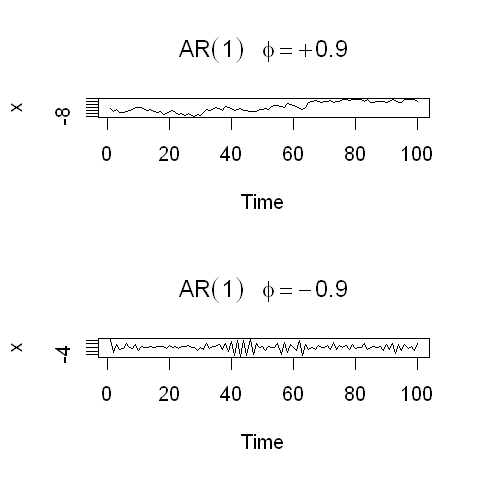

In [8]:
par(mfrow = c(2, 1))
ts.plot(arima.sim(list(order = c(1, 0, 0), ar = .9), n = 100), ylab = "x", main = (expression(AR(1)~~~phi == +.9)))
ts.plot(arima.sim(list(order=c(1, 0, 0), ar = -.9), n = 100), ylab = "x", main = (expression(AR(1)~~~phi == -.9)))

### Moving average processes

As an alternative to autoregression, think of wt as a "shock" to the process at time $t$. One can imagine that what happens today might be related to shocks from a few previous days. In this case, we have the moving average model of order $q$, abbreviated as $MA(q)$.

#### Definition

The moving average model of order $q$, or $MA(q)$ model, is defined to be

$$ x_t = \theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_p\epsilon_{t-p}+\epsilon_t\ \ \ (16)$$

where there are $q$ lags in the moving average and $\theta_1$,$\theta_2$,...,$\theta_q$ with ($\theta_q\neq0$) are parameters. Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with
mean zero and variance $\sigma_\epsilon^2$, unless otherwise stated. As in the $AR(p)$ case, the $MA(q)$ model may be written as

$$x_t = (1+\theta_1L+\theta_2L^2+...+\theta_qL^q)\epsilon_t$$

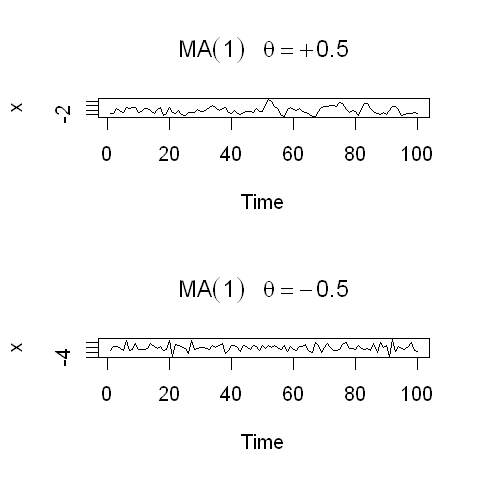

In [9]:
par(mfrow = c(2, 1))
ts.plot(arima.sim(list(order = c(0, 0, 1), ma = .9), n = 100), ylab = "x", main = (expression(MA(1)~~~theta == +.5)))
ts.plot(arima.sim(list(order = c(0, 0, 1), ma = -.9), n = 100), ylab = "x", main = (expression(MA(1)~~~theta == -.5)))

### ARMA processes

We now proceed with the general development of mixed autoregressive moving average __(ARMA)__ models for stationary time series.

#### Definition

A time series $x_t$, $t=0,\pm 1,\pm 2,...$ is $ARMA(p,q)$ if it is stationary and

$$ x_t = \phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}+\epsilon_t\ \ \ (17)$$

with $\phi_p\neq 0,\theta_q\neq 0$, and $\sigma_\epsilon^2 > 0$. The parameters $p$ and $q$ are called autoregressive and the moving average orders, respectively. If x_t has a nonzero mean $\mu$, we set $\alpha = \mu(1-\phi_1-...-\phi_p), and we write the model as

$$x_t = \alpha+\phi_1x_{t-1}+\phi_2x_{t-2}+...+\phi_px_{t-p}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}+\epsilon_t$$

Although it is not necessary yet, we assume that $\epsilon_t$ is a Gaussian white noise series with mean zero and variance $\sigma_\epsilon^2$, unless otherwise stated.

The ARMA model may be seen as a regression of the present outcome ($x_t$) on the past outcomes ($x_{t−1}$,...,$x_{t−p}$), with correlated errors.

The $ARMA(p,q)$ model in equation $(17)$ may be written in concise form as

$$(L)_{x_t}=\theta(L)\epsilon_t$$

#### Definition (Causality)

Consider an $ARMA(p,q)$ process, $\phi(L)x_t = \theta(L)\epsilon_t$, where $\phi(L)$ and $\theta(L)$ do not have common factors. The casual form of the model is given by

$$ x_t = \phi(L)^{-1}\theta(L)\epsilon_t = \psi(L)\epsilon_t = \sum_{j=0}^\infty\psi_j\epsilon_{t-j}\ \ \ (21)$$

with $\sum_j=0^\infty \mid\psi_j\mid<\infty$, where $\psi(L) = \sum_j=0^\infty\psi_jL^j$ with $\psi_0 = 1$ and $\phi(L)^{-1}$ exists. When it does exists, then $\phi(L)^{-1}\phi(L)=1$. Also, since $x_t = \psi(L)\epsilon_t$, we must have $\phi(L)\psi(L)\epsilon_t=\theta(L)\epsilon_t$ so the parameters $\psi_j$ may be obtained by matching coefficients of $L$ in $\phi(L)\psi(L)=\theta(L)$

#### Definition (Invertibility)
Consider an $ARMA(p,q)$ process, $\phi(L)x_t=\theta(L)\varepsilon_t$, where $\phi(L)$ and $\theta(L)$ do not have common factors. The invertible form of the model is given by

$$\epsilon_t =\theta(L)^{-1}\phi(L)x_t =\pi(L)x_t=\sum_{j=0}^\infty\pi_j x_{t-j}\ \ \ (22)$$

where $\pi(L)=\sum_{j=0}^\infty\pi_jL^j$ with $\pi_0=1$ and $\theta(L)^{-1}$ exists. When it does exists, then $\theta(L)^{-1}\theta(L)=1$. The parameters $\pi_j$ may be obtained by matching coefficients of $L$ in 
$\pi(L)\theta(L)=\psi(L)$


##### Remark
Causality requires that the present value of the time series, $x_t$, does not depend on the future (otherwise, forecasting would be futile). Invertibility requires that the present shock, $\epsilon_t$, does not depend on the future.

#### Definition (Causality and invertibility, existence)

Let

$$\phi(z) = 1-\phi_1z-...-\phi_pz^p$$
$$\theta(z) = 1+\theta_1z+...+\theta_qz^q$$

be the __AR__ and __MA__ polynomials obtained by replacing the backshift operator $L$ by a complex number $z$

An $ARMA(p,q)$ model $\phi(L)x_t = \theta(L)\epsilon_t$ is casual if and only if $\phi(z)\neq 0$ for all $\mid z\mid\leq 1$. The coefficients of the linear process given in equation $(21)$ can be determined by solving

$$\psi(z) = \sum_{j=0}^\infty\psi_jz^j=\frac{\theta(z)}{\phi(z)},\ \ \ \mid z\mid\leq 1$$

with $\psi_0 = 1$

An $ARMA(p,q)$ model is invertible if and only if $\theta(z)\neq 0$ for $\mid z\mid\leq 1$. The coefficient $\pi_j$ of $\pi(L)$ fo the linear process given in equation $(22)$ can be determined by solving

$$ \pi(z)=\sum_{j=0}^\infty\pi_jz^j=\frac{\phi(z)}{\theta(z)},\ \ \ \mid z\mid\leq 1$$

with $\psi_0=1$

##### Remark (Stationarity and causality)

An $AR(p)$ process $\phi(L)x_t = \epsilon_t$ is said to be causal if and only if all the roots of the characteristic equation $\phi(z) = 0$ lie outside the unit circle, i.e., $\mid z\mid > 1$ which implies that $\sum_{j=0}^\infty\mid\psi_j\mid<\infty$. Moreover $\sum_{j=0}^\infty\mid\psi_j\mid^2<\sum_{j=0}^\infty\mid\psi_j\mid<\infty$, therefore any casual $AR(p)$ process is stationary.

##### Example

Let us consider the $AR(1)$ process $x_t = \phi_{t-1}+\epsilon_t \sim WN(0,\sigma_\epsilon^2)$, then the process is casual (and stationary) if and only if $\mid\phi\mid<1$ and if $MA(\infty)$ (Wold representation is

$$ x_t = \frac{1}{1-\phi L}\epsilon_t = \sum_{j=0}^\infty\phi^j\epsilon_t=\sum_{j=0}^\infty\phi^j\epsilon_{t-j}$$

and $\psi_j = \phi^j$, for j = 0,1,2,... . Alternatively, you can get the same result by proceeding as follows

$$(1-\phi_1 z)(\psi_0+\psi_1z+\psi_2z^2+...) = 1$$

and the first few values are

\begin{equation}
\begin{split}
\psi_0 &= 1\\
\psi_1 - \phi\psi_0 &= 0\\
\psi_2 - \phi\psi_1 &= 0\\
\psi_3 - \phi\psi_2 &= 0\\
\end{split}
\end{equation}

therefore the $\psi$-weights satisfy $\psi_j=\phi^j$ for j=0,1,2,...

##### Exercise

Let us consider the $MA(1)$ process $x_t = \theta\epsilon_{t−1} + \epsilon_t$, with $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$. Verify that the process is causal (stationary) for all $\theta\in R$. Is the process $x_t$ invertible? Find the weights $\psi_j$ of the Wold representation, $\psi_j$ , for j = 0, 1, 2, ... .

The following code provides the first 50 $\psi$–weights of an $ARMA(1,1)$ process with given parameters in R:

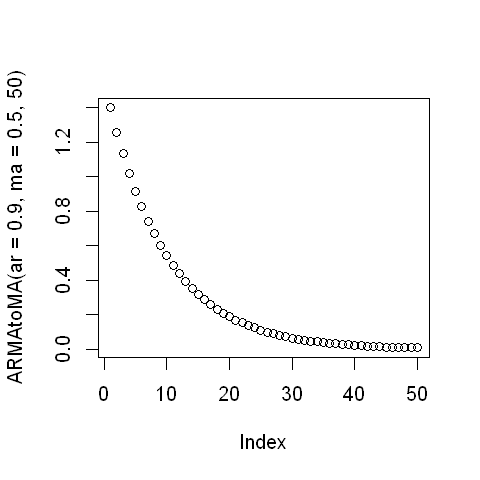

In [10]:
# ARMAtoMA (ar=0.9, ma=0.5, 50) # for a list
plot (ARMAtoMA (ar=0.9, ma=0.5, 50)) # for a graph

##### Remark

Let us consider the casual $ARMA(p,q)$ model $\phi(L)x_t = \theta(L)\epsilon_t$, to solve for the $\psi$-weights in general we must match the coefficients $\phi(z)\phi(z)=\theta(z)\epsilon_t$ as follows

$$(1-\phi_1z-\phi_2z^2-...)(\psi_0+\psi_1z+\psi_2z^2+...) = 1+\theta_1z+\theta_2z^2+...$$

and the first few values are

\begin{equation}
\begin{split}
\psi_0 &= 1\\
\psi_1 -\phi_1\psi_0 &=\theta_1\\
\psi_1 -\phi_1\psi_1 - \phi_2\psi_0 &=\theta_2\\
\psi_1 -\phi_1\psi_1 - \phi_2\psi_2 - \phi_3\psi_0 &=\theta_3
\end{split}
\end{equation}

where $\phi_j = 0$, for $j>p$ and $\theta_j = 0$, for $j>q$. Therefore the $\psi$-wheights satisfy the homogeneous difference equation $\psi_j-\sum_{k=1}^p\phi_k\psi_{j-k} = 0$ for $j\geq max\{p,q+1\}$ with initial conditions $\psi_j - \sum_{k=1}^j \phi_k\psi_{j-k} = \theta_j$, for $0\leq j \leq max\{p,q+1\}$. The general solution depends on the roots of the characteristic equation associated to the autoregressive polynomial.

### Difference equations

The treatment of ARMA processes is greatly enhanced by a basic knowledge of difference equations.

##### Example

Suppose we have a sequence of numbers $x_0$, $x_1$, $x_2$, ... such that $x_t = \phi x_{t−1}$ with $\phi \neq 0$
and t = 1, 2, ... . $x_t = \phi x_{t−1}$ is a homogeneous difference equation of order 1 and its solution is given by

\begin{equation}
\begin{split}
x_1 &= \phi x_0\\
x_2 &= \phi x_1 = \phi^2 x_0\\
&.\\
&.\\
&.\\
x_n &=\phi^n x_0
\end{split}
\end{equation}

and fiven an initial condition $x_0 = c$ we get the particular solution of the difference equation $x_n = \phi^n c$

The polynomial associated to the previous equation is $\phi(z) = 1 - \phi z$, and the root, say $z_0$, of this polynomial is $z_0 = \frac{1}{\phi}$ that is $\phi(z_0) = 0$

We know the only solution of the previous difference equation with initial condition $x_0 = c$, which is $x_n = \phi^n c = (z_0^-1)^n c$.

##### Example (Pseudo-cyclical behaviour)

Let us consider the $AR(2)$ process $x_t = \phi x_{t-1} +\phi_2 x_{t-2} + \epsilon_t$ with $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$ and $\phi_1=\frac{3}{2}$ and $\phi_2 = -\frac{3}{4}$. The characteristic equation associated to the homogeneous difference equation $x_t -\phi_1x_{t-1}-\phi_2x_{t-2} = 0$ is $\phi(z) = 1 -\phi_1z-\phi_2z^2 = 0$ with two complex roots $z_0 = 1 + i\frac{1}{\sqrt{3}}$, $z_0 = 1 - i\frac{1}{\sqrt{3}}$. Therefore

$$\rho = \frac{2}{\sqrt{3}}\,\ \ \ \theta = \frac{\pi}{6}$$

and the general solution of the homogeneous difference equation is

$$x_n=(\frac{2}{\sqrt{3}})^{-n}(c_1 cos(\frac{n\pi}{6}) + c_2 sin(\frac{n\pi}{6})) = \rho^{-n}d cos(n\theta-c)$$

where we assumed that $c_1 = c_2 = 1$, then $d = \sqrt{2}$ and $ c = cos^{-1}(\frac{1}{\sqrt{2}})$. The frequency of the pseudo-cycle is $f_c = \frac{\theta}{2\pi}$ and it is $p_c = \frac{1}{f_c} = 12$

In [11]:
## AR coefficients
phi = c( 1.5, -0.75)
## Roots 1 +- i/ sqrt (3)
(a = polyroot(c(1, -phi)))
## [1] 1+0.57735 i 1 -0.57735 i
## Period = 1/ freq
arg = Arg(a[1])/(2*pi)
1/arg
## [1] 12

[1] 1+0.57735i 1-0.57735i

[1] 12

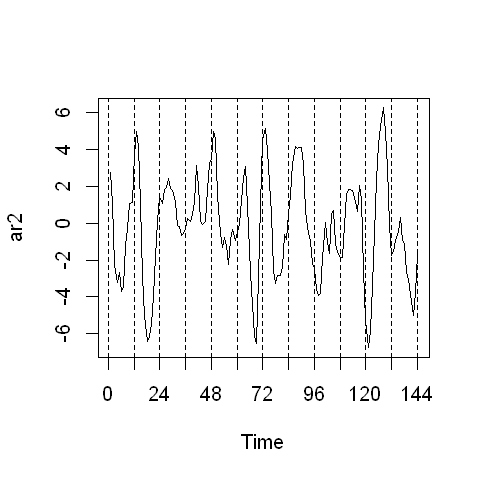

In [12]:
## Simulate and plot data
n = 144
ar2 = arima.sim(list(order = c(2, 0, 0), ar = phi ), n = n)
plot(ar2, axes = FALSE, xlab = "Time")
axis(2); axis(1, at = seq(0, 144, by = 12)); box()
abline(v = seq(0, 144, by = 12), lty = 2)

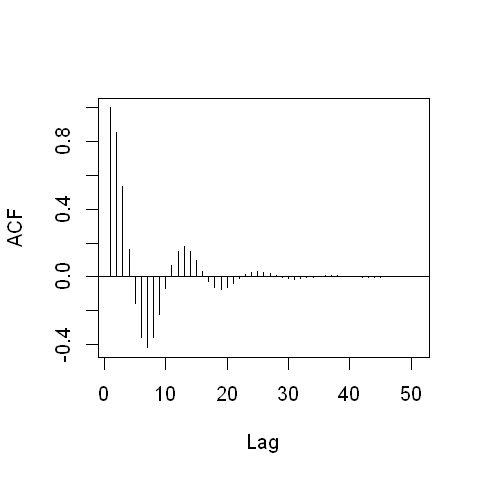

In [13]:
## Plot ACF
ACF = ARMAacf(ar = phi, ma = 0, 50)
plot(ACF, type = "h", xlab = "Lag")
abline(h = 0)

### Autocorrelation and partial autocorrelation functions

#### The autocorrelation function

##### Example (The ACF of $MA(q)$)

The $MA(q)$ model is defined in equation $(16)$. Because $x_t$ is a finite linear combination of white noise terms, the process is stationary with mean

$$ E(x_t) = \sum_{j=0}^q\theta_jE(\epsilon_{t-j}) = 0$$

where we have written $\theta_0 = 1$, and with auto-covariance function

\begin{equation}
\begin{split}
\gamma(h) &= cov(x_{t+h},x_t) = cov(\sum_{j=0}^q\theta_j\epsilon_{t+h-j},\sum_{k=0}^q\theta_k\epsilon_{t-k})\\
&=
\begin{cases}
\sigma_\epsilon^2\sum_{j=0}^{q-h}\theta_j\theta_{j+h}, & 0\leq h\leq q\\
0, & h>q.
\end{cases}
\end{split}
\end{equation}

The cutting off of $\gamma(h)$ after $q$ lags is the signature of the $MA(q)$ model. Dividing the previous formula by $\gamma(0)$ yields the ACF of an $MA(q)$

##### Example (The ACF of $AR(p)$)

The $AR(p)$ model is defined in equation $(13)$. The $AR(p)$ process can be rewritten as

$$x_t = \phi(L)^{-1}\theta(L)\epsilon_t = \psi(L)\epsilon_t$$

It follows immediately that $E(x_t) = 0$. Also, the autocovariance function of $x_t$ can be written as

\begin{equation}
\begin{split}
\gamma(h) &= cov(x_{t+h},x_t) = cov(\sum_{j=0}^\infty\psi_j\epsilon_{t+h-j},\sum_{k=0}^\infty\psi_k\epsilon_{t-k})\\
&=\sigma_\epsilon^2\sum_{j=0}^\infty\psi_j\psi_{j+h}
\end{split}
\end{equation}

Unlike the $MA(q)$, the ACF of an $AR(p)$ or an $ARMA(p,q)$ does not cut off at any lag, so using the ACF to help identify the order f AR or ARMA is difficult. Also the previous formula is not appealing in that it provides little information about the appearance of the ACF of various models.

#### The partial autocorrelation function

In the equation of the previous slide, we saw that for $MA(q)$ models, the ACF will be zero for lags greater than $q$. Moreover, because $\theta_q \neq 0$, the ACF will not be zero at lag $q$. Thus, the ACF provides a considerable amount of information about the order of the dependence when the process is a moving average process.

If the process, however, is ARMA or AR, the ACF alone tells us little about the orders of dependence. Hence, it is worthwhile pursuing a function that will behave like the ACF of MA models, but for AR models, namely, the partial autocorrelation function (PACF).

Recall that if X, Y and Z are random variables, then the partial correlation between X and Y given Z is obtained by regressing X on Z to obtain the predictor X, regressing Y on Z to obtain Y, and then calculating

$$\rho_{X,Y\mid Z} = corr(X - \hat{X},Y - \hat{Y})$$

The idea is that $\rho_{X,Y|Z}$ measures the correlation between $X$ and $Y$ with the linear effect of $Z$ removed (or partialled out). If the variables are multivariate normal, then this definition coincides with $\rho_{X,Y|Z} = corr(X,Y|Z).

To motivate the idea of partial autocorrelation, consider a causal $AR(1)$ model, $x_t = \phi x_{t-1} +\epsilon_t$. Then

\begin{equation}
    \begin{split}
        \gamma_x(2) &= cov(\phi x_{t-1} +\epsilon_t,x_{t-2})\\
        &= cov(\phi^2x_{t-2}+\phi\epsilon_{t-1} +\epsilon_t,x_{t-2})\\
        &= \phi^2\gamma_x(0)
    \end{split}
\end{equation}

This result follow from causality because $x_{t-2}$ involves $\{\epsilon_{t-2},\epsilon_{t-2},...\}$, which are all uncorrelated with $\epsilon_t$ and $\epsilon_{t-1}$.

The correlation between $x_t$ and $x_{t-2}$ is not zero as it would be for an $MA(1)$, because $x_t$ is dependente on $x_{t-2}$ through $x_{t-1}$.

Suppose we break this chain of dependence by removing (or partialling out) the effect of $x_{t−1}$. That is, we consider the correlation between $x_t −\phi x_{t−1}$ and $x_{t−2} −\phi x_{t−1}$, because it is the correlation between $x_t$ and $x_{t−2}$ with the linear dependence of each on $x_{t−1}$ removed. In this way, we have broken the dependence chain between $x_t$ and $x_{t−2}$.

In fact
\begin{equation}
    \begin{split}
        \gamma_x(2) &= cov(x_t - \phi x_{t-1},x_{t-2}-\phi x_{t-1})\\
        &= cov(\epsilon_t,x_{t-2}+\phi x_{t-1})\\
        &= 0
    \end{split}
\end{equation}

Hence, the tool we need is partial autocorrelation, which is the correlation between $x_s$ and $x_t$ with the linear effect of everything "in the middle" removed.

#### Definition (Partial autocorrelation function)

The partial autocorrelation function (PACF) of a stationary process, $x_t$ denoted $\phi_{hh}$, for h = 1,2,.... is

\begin{equation}
    \begin{split}
        \phi_{00} &= corr(x_t,x_t) = 1\\
        \phi_{11} &= corr(x_{t+1},x_t) = \rho(1)\\
        \phi_{hh} &= corr(x_{t+h}-\hat{x}_{t+h},x_t-\hat{x}_t)\ \ \ \ h\geq 2
    \end{split}
\end{equation}

where $\hat{x}_{t+h}$ is the regression of $x_{t+h}$ on $\{x_{t+1},x_{t+2},...,x_{t+h-1}\}$ and $\hat{x}_t$ is the regression of $x_t$  on $\{x_{t+1},x_{t+2},...,x_{t+h-1}\}$, on each, removed.

### Estimation of PACF

#### Proposition (BLP for stationary processes)

Given data $x_1,...,x_n$ the best linear predictor (BLP) $x_{n+m}^n = E(x_{n+m}|x_{1:n}) = \alpha_0+\sum_{k=1}^n a_kx_k$ of $x_{n+m}$ for $m\geq 1$ is found by minimizing the mean square eror (MSE).

$$arg\ min_\alpha Q(\alpha) = E(x_{n+m}-x_{n+m}^n)^2$$

leading to

$$E\left[ (x_{n+m}-x_{n+m}^n) x_k\right] = 0\ \ \ \ k=0,1,...,n$$

where $x_0 = 1$ for $\alpha_0,\alpha_1,...,\alpha_n$. The previous equations are called the prediction equations.

Hereafter, without loss of generality we assume $\alpha_0 = 0$

#### One-step ahead prediction

Given the data $x_1,...,x_n$, we wish to forecast the value of the time series at the next point in time $x_{n+1}$

The BLP of $x_{n+1}$ is

$$ x_{n+1}^n = \phi_{n,1}x_n+\phi_{n,2}x_{n-1}+...+\phi_{n,n}x_1$$

Where $\phi_{n,j}$ denotes the dependence of the coefficients on $n$. Using the equations from the previous slide the coefficients $\phi_{n,j}$ for j=1,2,...,n satisfy

$$E\left[ \left(x_{n+1} - \sum_{j=1}^n \phi_{n,j}x_{n+1-j}\right) x_{n+1-k}\right] = 0\ \ \ \ k=1,2,...n$$

or

$$\sum_{j=1}^n \phi_{n,j}\gamma(k-j) = \gamma(k)\ \ \ \ k=1,2,...,n$$

The prediction equations can be written in matrix form

$$\Gamma_n\phi_n=\gamma_n$$

where

$$\Gamma_n = 
\begin{bmatrix}
    \gamma(0) & \gamma(1) & ... & \gamma(n) \\
    \gamma(1) & \gamma(0) & ... & \gamma(n-1) \\
    ... & ... & ... & ... \\
    \gamma(n) & \gamma(n-1) & ... & \gamma(0)
\end{bmatrix} $$

and $\phi_n = (\phi_{n,1},\phi_{n,2},...,\phi_{n,n})'$ and $\gamma_n = (\gamma(1),\gamma(2),...,\gamma(n))'$ are $n\times 1$ vectors.

if $\Gamma_n$ is non singular then the elements of $\phi_n$ are uniquely determined by $\phi_n = \Gamma_n^{-1}\gamma_n$

For (stationary) $ARMA$ processes the fact that $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$, $\sigma_\epsilon^2>0$ and lim_{h\to 0}\gamma(h) = 0$ are sufficient conditions for $\Gamma_n$ positive definite.

Sometimes it is convenient to write the one-step ahead forecast in vector notation $x_{n+1}^n = \phi_n' x$ where $x = (x_n,x_{n-1},...,x_1)$

#### One step ahead prediction error

The mean square one-step ahead prediction error is

$$ P_{n+1}^n = E(x_{n+1}-x_{n+1}^n)2 = \gamma(0) - \gamma_n'\Gamma_n^{-1}\gamma_n$$

#### The Durbin-Levinson algorithm

Equation $\phi_n = \Gamma_n^{-1}\gamma_n$ and $P_{n+1}^n = \gamma(0) - \gamma_n'\Gamma_n^{-1}\gamma_n$ can be solved iteratively as follows

\begin{equation}
    \begin{split}
        \phi_{0,0} &= 0 \\
        \phi_{n,n} &= \frac{\rho(n)-\sum_{k=1}^{n-1}\phi_{n-1,k}\rho(n-k)}{1-\sum_{k=1}^{n-1}\phi_{n-1,k}\rho(k)}
    \end{split}
\end{equation}

where $\rho(h)$ is the ACF at the $h$-th lag and for $n\geq 2$, $\phi_(n,k) = \phi(n-1,k)-\phi_{n,n}\phi_{n-1,n-k}$ with k = 1,2,...,n-1 and

\begin{equation}
    \begin{split}
        P_1^0 &=\gamma(0) \\
        P_{n+1}^n &= P_n^{n-1} (1-\phi_{n,n}^2)\ \ \ \ n\geq 1
    \end{split}
\end{equation}

The Durbin–Levinson algorithm provides an iterative method for computing the PACF of a stationary process.

##### Proposition

The PACF of a stationary process $x_t$ can be obtained iteratively as $\phi_{n,n}$ for n = 1,2,... using the Durbin-Levinson algorithm

##### Example (Pseudo-cyclical behaviour, cont'ed)

Let us consider the pseudo-cyclical $AR(2)$ process $x_t = \phi_1 x_{t-1} + \phi_2x_{t-2}+\epsilon_t$, with $\epsilon_t \sim WN(0,\sigma_\epsilon^2)$ and $\phi_1 = \frac{3}{2}$ and $\phi_2 = -\frac{3}{4}$. The roots of the characteristic equation are $z_0 = 1+i\frac{1}{\sqrt{3}},\ z_0 = 1-i\frac{1}{\sqrt{3}}$ with $\rho = \frac{2}{\sqrt{3}}$ and $\theta=\frac{\pi}{6}$ and general solution of the homogeneous difference equation is

$$x_n = \left( \frac{2}{\sqrt{3}}\right)^{-n}\left( c_1cos\left(\frac{n\pi}{6}\right)+c_2sin\left(\frac{n\pi}{6}\right)\right)$$

Let now consider the ACF of the process

\begin{equation}
    \begin{split}
        \gamma_x(0) &= \phi_1\gamma_x(1) + \phi_2\gamma_x(2) + \sigma_\epsilon^2 \\
        \gamma_x(1) &= \phi_1\gamma_x(0) + \phi_2\gamma_x(1) \\
        \gamma_x(h) &= \phi_1\gamma_x(h-1) + \phi_2\gamma_x(h-2)\ \ \ \ \forall h\geq 2
    \end{split}
\end{equation}

The last equation is an homogeneous difference equation of order 2 with characteristic polynomial $\phi(z) = 1 - \phi_1z-\phi_2z^2$ with initial conditions given by the two previous equations, whose solution is given in the first equation.

### Exercises

#### Exercise 1

Let $x_t$ be the following $AR(1)$ process

$$x_t = \mu + \phi x_{t-1} + \epsilon_t\ \ \ \ \epsilon_t\sim N(0,\sigma_\epsilon^2)$$

then

* calculate the mean function of x_t
* provide the conditions on $(\mu,\phi,\sigma_\epsilon^2)$ for the weak stationarity of the process
* calculate the autocovariance function of $x_t$
* calculate the autocorrelation function of $x_t$

#### Exercise 2

Let $z_t$ be the following $MA(1)$ process

$$z_t = \mu + \theta \epsilon_{t-1} + \epsilon_t\ \ \ \ \epsilon_t \sim N(0,\sigma_\epsilon^2)$$

then

* calculate the mean function of $z_t$
* provide the conditions on $(\mu,\theta,\sigma_\epsilon^2)$ for the weak stationarity of the process
* calculate the autocovariance function of $z_t$
* calculate the autocorrelation function of $z_t$

#### Exercise 3

Let $y_t$ be the following $ARMA(1,1)$ process

$$y_t = \mu +\phi y_{t-1} +\theta\epsilon_{t-1}+\epsilon_t\ \ \ \ \epsilon_t \sim N(0,\sigma_\epsilon^2)$$

then

* calculate the mean function of $y_t$
* provide the conditions on $(\mu,\phi,\theta, \sigma_\epsilon^2)$ for the weak stationarity of the process
* provide the conditions on $(\mu,\phi,\theta, \sigma_\epsilon^2)$ for the invertibility of the process
* calculate the autocovariance function of $y_t$
* calculate the autocorrelation function of $y_t$

### Estimation

We assume we have $n$ observations, $x_1, ..., x_n$, from a causal and invertible Gaussian $ARMA(p,q)$ process in which, initially, the order parameters, $p$ and $q$, are known.

Our goal is to estimate the parameters, $\phi_1, \phi_2, ..., \phi_p,\ \theta_1, \theta_2, ..., \theta_q$, and $\sigma^2_\epsilon$. We will discuss the problem of determining $p$ and $q$ later in this section.

We begin with method of moments estimators. The idea behind these estimators is that of equating popuation moments, $E\left(x_k^t\right)$, to sample moments,$\frac{1}{n}\sum_{t=1}^nx^k_r$ for $k = 1, 2, ...$, and then solving for the parameters in terms of the sample moments.

We immediately see that, if $E(x_t) = \mu$, then the method of moments estimator of $\mu$ is the sample average, $\bar{x}$. Thus, while discussing method of moments, we will assume $\mu = 0$.

Although the method of moments can produce good estimators, they can sometimes lead to suboptimal estimators. We first consider the case in which the method leads to optimal
(efficient) estimators, that is, $AR(p)$ models.

#### Yule-Walker

The Yule-Walker equations are given by

\begin{equation}
    \begin{split}
        \rho(h) &= \phi_1\rho(h-1)+\phi_2\rho(h-2)+...+\phi_p\rho(h-p)\ \ \ \ \ h=1,2,...,p\\
        \sigma_\epsilon^2 &= \gamma(0)[1-\phi_1\rho(1)-\phi_2\rho(2)-...-\phi_p\rho(p)]
    \end{split}
\end{equation}

In the case of $AR(p)$ models, the Yule–Walker estimators are optimal estimators, but this is not true for $MA(q)$ or $ARMA(p,q)$ models. $AR(p)$ models are linear models, and the Yule–Walker estimators are essentially least squares  estimators. $MA$ or $ARMA$ models are nonlinear models, so this technique does not give optimal estimators.

#### Method of moments

##### Example

Consider te $MA(1)$ model $x_t = \epsilon_t+\theta\epsilon_{t-1}$ where $|\theta|<1$. The model can be written as

$$x_t = -\sum_{j=1}^\infty (-\theta)^jx_{t-j}+\epsilon_t$$

which is nonlinear in $\theta$. The first two population autocovariances are

\begin{equation}
    \begin{split}
        \gamma(0) &= \sigma_\epsilon^2(1+\theta^2)\\
        \gamma(1) &= \sigma_\epsilon^2\theta
    \end{split}
\end{equation}

so that the estimates of $\theta$ is found by solving the empirical counterpart of

$$\rho(1) = \frac{\theta}{1+\theta^2}$$

Two solutions exists, so we pick the invertible one

#### Conditional least squares

The preferred method of estimation is maximum likelihood estimation (MLE), which determines the values of the parameters that are most likely to have produced the observations.

For normal models, this is the same as weighted least squares.

For ease, we first discuss conditional least squares.

Consider a simple $AR(1)$ model, $x_t = \phi x_{t-1} +\epsilon_t$. In this case, the error sum of squares is

$$S(\phi) = \sum_{t=1}^n(x_t -\phi x_{t-1})^2$$

We have a problem because we do not observe $x_0$. Let us make life easier by forgetting the problem and dropping the first term. That is, let us perform least squares using the (conditional) sum of squares

$$S_C(\phi) = \sum_{t=2}^n(x_t -\phi x_{t-1})^2$$

becuase that is easy (it is just OLS) and if $n$ is in range, it should not matter much. We know from regression that the solution is

$$\hat{\phi} = \frac{\sum_{t=2}^nx_tx_{t-1}}{\sum_{t=2}^nx_t^2}$$

which is nearly the Yule-Walker estimate

Now we focus on conditional least squares for $ARMA(p,q)$ models via Gauss-Newton. Write the model parameters as $\beta = (\phi_1,\phi_2,...,\phi_p,\theta_1,...,\theta_q)$, and for the ease of discussion, we will put $\mu = 0$. Write the $ARMA$ model in terms of the errors

$$w_t(\beta) = x_t -\sum_{j=1}^p\phi_jx_{t-j} - \sum_{j=1}^q\theta_kw_{t-k}(\beta)$$

emphasizing the dependence of the errors on the parameters (recall that $\epsilon_t = \sum_{j=0}^\infty \pi_jx_{t-j}$ by invertibility, and the $\pi_j$ are complicated functions of $\beta$)

Again we have the problem that we do not observe the $x_t$ for $t\leq0$, nor the errors $w_t$

For conditional least squares, we condition on $x_1,x_2,...,x_p$, (if $p>0$) and we set $w_{p-1} = w_{p-2} = ... = w_{p+1-q} = 0$ (if $q>0$), in which case, given $\beta$, we may the previous equation for t = p+1, p+2,...,n

Using the conditioning argument, the conditional error sum of squares is

$$S_C(\beta) = \sum_{t=p+1}^n \left[w_t(\beta)\right]^2$$

Minimizing $S_C(\beta)$ with respect to $\beta$ yields the conditional least squares estimates.

We could use a brute force method where we evaluate $S_C(\beta)$ over a grid of possible values for the parameters and choose the values with the smallest error sum of squares, but this method becomes prohibitive if there are many parameters.

if $q=0$, the problem is linear regression as we saw in the case of the $AR(1)$.

if $q>0$, the problem becomes nonlinear regression and we will rely on numerical optimization

Gauss-Newton uses an iterative method for solving the problem of minimizing the function of the previous slide

#### Unconditional least squares

Estimation of the parameters in an $ARMA$ model is more like weighted least squares than ordinary least squares. Consider the normal regression model $x_t = \beta_0 + \beta_1z_t + \epsilon_t$, where now, the errors have possibly different variances, $\epsilon_t \sim N(0,\sigma^2h_t)$

In this case, we use weighted least squares to minimize

$$S(\phi) = \sum_{t=1}^n\frac{(x_t-\beta_0-\beta_1z_1)^2}{h_t}$$

with respect to the $\beta$'s. This problem is more difficult because the weights, $h_t^{-1}$, are rarely known (the case $h_t = 1$ is ordinary least squares)

For $ARMA$ models, however, we do know the structure of these variances

For ease, we will concentrate on the $AR(1)$ model,

$$x_t = \mu + \phi(x_{t-1}-\mu) +\epsilon_t$$

where $|\phi|<1$ and $\epsilon_t\sim N(0,sigma^2)$

Given data $x_1,x_2,...,x_n$ the model equation below does not include a regression for the first observation because $x_0$ is not observed. However, we know that

$$x_1\sim N\left(\mu,\frac{\sigma_\epsilon^2}{1-\phi^2}\right)$$

In this case, we have $h_1=\frac{1}{1-\phi^2}$ and $h_t = 1$ for $t\geq2$. This, the unconditional sum of squares is now

$$S(\mu,\phi) = (1-\phi^2)(x_1-\mu)^2+\sum_{t=2}^n(x_t-(1-\phi)\mu -\phi x_{t-1})^2$$

In conditional least squares, we conditioned away the nasty part involving $x_1$ to make the problem easier. For unconditional least squares, we need to use numerical optimization even for the simple $AR(1)$ case.

This problem generalizes in an obvious way to $AR(p)$ models and in a not so obvious way to $ARMA$ models in general. For us, unconditional least squares is equivalent to maximum likelihood estimation (MLE).

MLE involves finding the "most likely" parameters given the data. In the general case of causal and invertible $ARMA(p,q)$ models, maximum likelihood estimation, least squares estimation (conditional and unconditional), and Yule–Walker estimation in the case of $AR$ models, all lead to optimal estimators for large sample sizes.